# 📦 Bag-to-Box Assignment Using 3 Box Categories

In [178]:
import pandas as pd
import math
import numpy as np
from itertools import combinations

## Step 1: Define Example Bags (3 of each)

In [ ]:

bag_types = {
    "Mini": ["Chanel Mini", "Jacquemus Le Chiquito"],
    "Small": ["Chanel Small Flap", "LV Alma BB", "Gucci Mini Dionysus"],
    "Medium": ["Chanel Medium to Maxi Flap", "LV Speedy 25-35", "Bottega Jodie"],
    "Large": ["Dior Book Tote", "LV OnTheGo GM", "Goyard Artois"],
    "X-Large": ["Horizon 55", "Rimowa Cabin"]
}

bag_dimensions = {
    "Mini": (18, 10, 6, 0.4),
    "Small": (24, 15, 8, 0.6),
    "Medium": (30, 20, 12, 0.9),
    "Large": (40, 30, 15, 1.2),
    "X-Large": (55, 40, 25, 2.5)
}

bags_list = []
for bag_type, models in bag_types.items():
    for model in models:
        for _ in range(3):
            l, w, h, wt = bag_dimensions[bag_type]
            bags_list.append({
                "bag_name": model,
                "bag_type": bag_type,
                "length_cm": l,
                "width_cm": w,
                "height_cm": h,
                "weight_kg": wt,
                "volume_cm3": l * w * h
            })

bags_df = pd.DataFrame(bags_list)
bags_df.to_csv('bags_example.csv', index=False)
bags_df.head()


In [ ]:
import pandas as pd
import os

class BagInventory:
    def __init__(self, csv_path="bags.csv"):
        self.csv_path = csv_path
        self.bag_type_thresholds = {
            "Mini":     (21, 7, 13),
            "Small":    (27, 10, 18),
            "Medium":   (35, 14, 25),
            "Large":    (48, 20, 35),
            "X-Large":  (float('inf'), float('inf'), float('inf'))
        }
        self.bags = self._load_existing_bags()

    def _load_existing_bags(self):
        if os.path.exists(self.csv_path) and os.path.getsize(self.csv_path) > 0:
            # Try UTF-8, fallback to ISO-8859-1 (Latin1)
            try:
                return pd.read_csv(self.csv_path, encoding="utf-8").to_dict(orient="records")
            except (pd.errors.EmptyDataError, UnicodeDecodeError):
                try:
                    return pd.read_csv(self.csv_path, encoding="ISO-8859-1").to_dict(orient="records")
                except Exception as e:
                    print(f"Failed to load bags.csv with fallback encoding: {e}")
                    return []
        return []

    def infer_bag_type(self, l, h, w):
        for btype, (max_l, max_h, max_w) in self.bag_type_thresholds.items():
            if l < max_l and h < max_h and w < max_w:
                return btype
        return "Customized"

    def add_bag(self, bag_name, length_cm, width_cm, height_cm, weight_kg, count=1):
        bag_type = self.infer_bag_type(length_cm, height_cm, width_cm)
        for _ in range(count):
            self.bags.append({
                "bag_name": bag_name,
                "bag_type": bag_type,
                "length_cm": length_cm,
                "width_cm": width_cm,
                "height_cm": height_cm,
                "weight_kg": weight_kg,
                "volume_cm3": length_cm * width_cm * height_cm
            })

    def to_dataframe(self):
        return pd.DataFrame(self.bags)

    def save_to_csv(self, path=None):
        df = self.to_dataframe()
        save_path = path if path else self.csv_path
        df.to_csv(save_path, index=False)
        
inch_to_cm = 2.54
inventory = BagInventory()
    
# #Add custom bag
# inventory.add_bag(
#     bag_name="Burberry - Lambskin Quilted Card Case With Detachable Strap Black",
#     length_cm=4 * inch_to_cm,
#     width_cm=1 * inch_to_cm,
#     height_cm=3 * inch_to_cm,
#     weight_kg=0.8,
#     count=1
# )

# Export
inventory.save_to_csv("bags.csv")

# Optional: View DataFrame
bags_df = inventory.to_dataframe()

bags_df.head()


,Unnamed: 0,bag_name,bag_type,length_cm,width_cm,height_cm,weight_kg,volume_cm3
0,0,Chanel Mini,Mini,18.0,10.0,6.0,0.4,1080.0
1,1,Chanel Mini,Mini,18.0,10.0,6.0,0.4,1080.0
2,2,Chanel Mini,Mini,18.0,10.0,6.0,0.4,1080.0
3,3,Jacquemus Le Chiquito,Mini,18.0,10.0,6.0,0.4,1080.0
4,4,Jacquemus Le Chiquito,Mini,18.0,10.0,6.0,0.4,1080.0


## Step 2: Define Shipping Companies Original Boxes

In [12]:
import pandas as pd

inch_to_cm = 2.54

# --- Step 1: Define FedEx Boxes ---
fedex_boxes = {
    "carrier": ["FedEx"] * 7,
    "category": ["Extra Small", "Small", "Small", "Medium", "Large", "Extra Large", "Extra Large"],
    "box_info": [
        (8, 6, 2, 1),  # Extra Small
        (8, 6, 5, 1), (12, 9, 2, 1),  # Small
        (12, 9, 6, 1),  # Medium
        (15, 11, 6, 1),  # Large
        (16, 12, 9, 1), (12, 10, 9, 1)  # Extra Large
    ]
}

# --- Step 2: Define USPS Boxes ---
usps_boxes = {
    "carrier": ["USPS"] * 13,
    "category": ["Box-1096L", "Box-4", "Box-1097", "Shoe Box", "Box-1095", "Box-7", "Box-1092", "Express Box 1 Top Loading","Express Box 2 Side Loading","Express Box","Cremated Remains Animal", "Cremated Remains Human", "Cold Chain Packaging"],
    "box_info": [
        (9.5, 6.5, 2.25, 1), 
        (7.25, 7.25, 6.5, 1),
        (13.5, 11.5, 2.5, 1),
        (15, 7.5, 5.25, 1), 
        (15, 12, 3.125, 1),
        (12.25, 12, 8.5, 1),
        (14, 12, 3, 1),
        (11.75, 8.75, 5.75, 1),
        (14.25, 12, 3.5, 1),
        (15, 12, 3.25, 1),
        (9, 7.25, 5, 1),
        (14.75, 10.25, 10, 1),
        (14, 11.75, 12.125, 1)
    ]
}

# --- Step 3: Define UPS Boxes ---
ups_boxes = {
    "carrier": ["UPS"] * 21,
    "category": ["Extra Small", "Extra Small", "Extra Small", "Extra Small", "Small", "Small", "Small", "Small", "Medium", "Medium", "Medium", "Medium", "Large", "Large", "Large", "Large", "Extra Large", "Extra Large", "Extra Large", "Extra Large", "Giant"],
    "box_info": [
        (8, 6, 2, 1),(6, 4, 4, 1),(11, 9, 1, 1),(4, 4, 4, 1),  # Extra Small
        (8, 6, 5, 1),(12, 9, 2, 1),(9, 7, 3, 1),(6, 6, 6, 1),  # Small
        (13, 11, 2, 1), (12, 9, 6, 1),(13, 12, 4, 1), (8, 8, 8, 1),  # Medium
        (12, 12, 7, 1),(15, 11, 6, 1),(14, 10, 7, 1),(10, 10, 10, 1),  # Large
        (16, 12, 9, 1), (12, 10, 9, 1),(18, 12, 6, 1),(12, 12, 12, 1),(22, 22, 22, 1)  # Extra Large and Giant
    ]
}

# --- Step 4: Combine into one dictionary ---
combined_data = {
    "carrier": fedex_boxes["carrier"] + usps_boxes["carrier"] + ups_boxes["carrier"],
    "category": fedex_boxes["category"] + usps_boxes["category"] + ups_boxes["category"],
    "box_info": fedex_boxes["box_info"] + usps_boxes["box_info"] + ups_boxes["box_info"]
}

# --- Step 5: Create DataFrame and calculate derived columns ---
box_df = pd.DataFrame(combined_data)
box_df[['length_in', 'width_in', 'height_in', 'shipping_cost_usd']] = pd.DataFrame(box_df['box_info'].tolist(), index=box_df.index)
box_df['volume_in3'] = box_df['length_in'] * box_df['width_in'] * box_df['height_in']
box_df['length_cm'] = box_df['length_in'] * inch_to_cm
box_df['width_cm'] = box_df['width_in'] * inch_to_cm
box_df['height_cm'] = box_df['height_in'] * inch_to_cm
box_df['volume_cm3'] = box_df['length_cm'] * box_df['width_cm'] * box_df['height_cm']
box_df['box_type'] = [f"{row.carrier}_{row.category[:2]}_{i+1}" for i, row in box_df.iterrows()]
box_df = box_df.sort_values("volume_cm3").reset_index(drop=True)

# --- Step 6: Save to CSV ---
box_df.to_csv('box.csv', index=False)

# Optional preview
box_df.head()

,carrier,category,box_info,length_in,width_in,height_in,shipping_cost_usd,volume_in3,length_cm,width_cm,height_cm,volume_cm3,box_type
0,UPS,Extra Small,"(4, 4, 4, 1)",4.0,4.0,4.0,1,64.0,10.16,10.16,10.16,1048.772096,UPS_Ex_24
1,FedEx,Extra Small,"(8, 6, 2, 1)",8.0,6.0,2.0,1,96.0,20.32,15.24,5.08,1573.158144,FedEx_Ex_1
2,UPS,Extra Small,"(8, 6, 2, 1)",8.0,6.0,2.0,1,96.0,20.32,15.24,5.08,1573.158144,UPS_Ex_21
3,UPS,Extra Small,"(6, 4, 4, 1)",6.0,4.0,4.0,1,96.0,15.24,10.16,10.16,1573.158144,UPS_Ex_22
4,UPS,Extra Small,"(11, 9, 1, 1)",11.0,9.0,1.0,1,99.0,27.94,22.86,2.54,1622.319336,UPS_Ex_23


## Step 3: Choose One Smallest Box From Each Category (3 Categories)

In [8]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

class Bag:
    def __init__(self, name, length, height, width, weight_kg=0.2):
        self.name = name
        sorted_dims = sorted([length, height, width])
        self.length_cm = sorted_dims[2]
        self.height_cm = sorted_dims[1]
        self.width_cm = sorted_dims[0]
        self.weight_kg = weight_kg
        self.bag_type = self.class_bag()
        
    def class_bag(self):
        l, h, w = self.length_cm, self.height_cm, self.width_cm
        
        if l < 21 and w < 7 and h < 13:
            bag_type = 'Mini'
        elif l < 27 and w < 10 and h < 18:
            bag_type = 'Small'
        elif l < 35 and w < 14 and h < 25:
            bag_type = 'Medium'
        elif l < 48 and w < 20 and h < 35:
            bag_type = 'Large'
        elif 48 <= l and 20 <= w and 35 <= h:
            bag_type = 'X-Large'      
        
        return bag_type
    
    def to_dict(self):
        return {
                "bag_name": self.name,
                "bag_type": self.bag_type,
                "length_cm": self.length_cm,
                "width_cm": self.width_cm,
                "height_cm": self.height_cm,
                "weight_kg": self.weight_kg,
                "volume_cm3": self.length_cm * self.width_cm * self.height_cm            
        }

class classifier:
    def __init__(self,csv_path):
        self.csv_path = csv_path
    def classify_bag(self):
        bag_df = pd.read_csv(self.csv_path)
        bag_list = []
        
        for i in range(len(bag_df)):
            bag = Bag(
                name = bag_df.loc[i, 'bag_name'], 
                length = bag_df.loc[i, 'length_cm'], 
                height = bag_df.loc[i, 'height_cm'], 
                width = bag_df.loc[i, 'width_cm'], 
                weight_kg = bag_df.loc[i, 'weight_kg']
            )
            bag_list.append(bag.to_dict())
        
        return pd.DataFrame(bag_list)
    

bagclassifier = classifier('bags.csv')
classified_bags = bagclassifier.classify_bag()

classified_bags.tail()


,bag_name,bag_type,length_cm,width_cm,height_cm,weight_kg,volume_cm3
43,LV mini cone decorated with the CASSANDRE,Mini,12.000,4.000,7.500,0.8,360.000000
44,LV The Speedy Bandoulière 20,Medium,20.574,11.938,13.462,0.8,3306.434290
45,LV Pegase 55 leather travel bag,X-Large,55.118,21.082,39.116,0.8,45452.701094
46,Mini Devotion Leather Top Handle Bag,Mini,19.050,5.080,12.065,0.8,1167.578310
47,Burberry - Lambskin Quilted Card Case With Det...,Mini,10.160,2.540,7.620,0.8,196.644768


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations, permutations
from sklearn.cluster import KMeans
from typing import Dict, Any, Optional, List


class BoxAssigner:
    """
    Assign bags to a limited set of box TYPES (unlimited quantity of each type).

    Modes:
      - selected_carrier in {'fedex','ups','usps'}: filter existing catalog by carrier
      - 'mixed': use the entire provided box_df
      - 'customized': IGNORE box_df and synthesize NEW boxes by clustering bag sizes
                      and padding the cluster maxima (rotation allowed).

    Optimization (current): minimize total volume of the representative boxes used.
    """

    def __init__(self, box_df: pd.DataFrame, num_of_box: int, custom_cfg: Optional[Dict[str, Any]] = None):
        """
        Args:
            box_df: catalog of available boxes (ignored in 'customized' mode)
            num_of_box: number of box TYPES allowed (quantities are unlimited)
            custom_cfg: config for 'customized' mode (see set_custom_config)
        """
        self.box_df = box_df.copy()
        self.num_of_box = int(num_of_box)
        self.box_df_filtered: Optional[pd.DataFrame] = None
        self.custom_cfg = custom_cfg or {
            "pad_pct": 0.05,       # 5% dimension padding for custom boxes
            "round_mode": "ceil",  # 'ceil' is safer than 'round' after padding
            "round_to_mm": None,   # e.g., 5 to snap to 5 mm increments (internal dims)
            "n_clusters": None,    # default → num_of_box
            "base_name": "CUST"    # prefix for synthetic box_type labels
        }

    # ------------------- Public API -------------------

    def set_custom_config(self, cfg: Dict[str, Any]) -> None:
        """Update configuration used in 'customized' mode."""
        self.custom_cfg.update(cfg or {})

    def assigner(self, bags_df: pd.DataFrame, selected_carrier: str = 'mixed'):
        """
        Assign each bag to the first representative box that fits (rotation allowed).

        Args:
            bags_df: DataFrame with at least ['bag_name','length_cm','width_cm','height_cm']
            selected_carrier: 'fedex' | 'ups' | 'usps' | 'mixed' | 'customized'

        Returns:
            best_assignment: dict { 'BOX_LABEL (LxWxH in)': [bag_name, ...], ... }
            results: dict like {'cost': total_volume, 'BOX_LABEL (...)': count, ...}
        """
        selected_carrier = str(selected_carrier).lower()
        self.box_df_filtered = self._get_filtered_boxes(selected_carrier, bags_df)

        # combos of box TYPES we’re allowed to use
        category_combos = list(combinations(self.box_df_filtered['box_type'].unique(), self.num_of_box))

        best_assignment = {}
        best_results = {}
        best_cost = np.inf

        def representative(df: pd.DataFrame) -> pd.DataFrame:
            # choose the smallest-volume representative per box_type
            reps = (df.sort_values('volume_cm3')
                      .groupby('box_type', as_index=False)
                      .first()
                      .sort_values('volume_cm3')
                      .reset_index(drop=True))
            # attach a human-friendly label with inch dims
            reps = reps.copy()
            reps['label_in'] = reps.apply(self._box_label_with_inches, axis=1)
            return reps

        for categories in category_combos:
            selected_boxes = self.box_df_filtered[self.box_df_filtered['box_type'].isin(categories)]
            rep_boxes = representative(selected_boxes)

            # quick feasibility: can the largest bag fit at least one rep box?
            if not self._feasible_any(rep_boxes, bags_df):
                continue

            # assignment containers (keys are the inch-labeled names)
            assigned = {lbl: [] for lbl in rep_boxes['label_in']}
            box_counts = {'cost': 0.0, **{lbl: 0 for lbl in rep_boxes['label_in']}}

            # assign each bag to the first rep box that fits (rotation allowed)
            for _, bag in bags_df.iterrows():
                placed = False
                for m in range(self.num_of_box):
                    box = rep_boxes.iloc[m]
                    if self._bag_fits_box(bag, box):
                        lbl = box['label_in']  # use the name that includes inches
                        assigned[lbl].append(bag['bag_name'])
                        box_counts[lbl] += 1
                        box_counts['cost'] += float(box['volume_cm3'])
                        # Later: replace with shipping cost or weighted combo
                        placed = True
                        break
                if not placed:
                    # infeasible with this combo
                    assigned = None
                    break

            if assigned is None:
                continue

            # minimize total cost (currently total volume)
            if box_counts['cost'] < best_cost:
                best_cost = box_counts['cost']
                best_assignment = assigned
                best_results = box_counts

        return best_assignment, best_results

    def plot_assignment(self, results: Dict[str, float]) -> None:
        """Simple bar chart: count of items per box type (ignores 'cost')."""
        records = []
        for box_label, count in results.items():
            if box_label != 'cost':
                records.append({'BoxType': box_label, 'Count': count})

        if not records:
            print("No assignment to plot.")
            return

        df = pd.DataFrame(records)

        plt.figure(figsize=(10, 5))
        plt.bar(df['BoxType'], df['Count'], edgecolor='black')
        plt.title('Box Usage Counts')
        plt.xlabel('Box Type (with inch dims)')
        plt.ylabel('Item Count Assigned')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def table_assignments(self, best_assignment: Dict[str, List[str]]) -> pd.DataFrame:
        """
        Return a DataFrame showing per-box-type assigned bags.
        (I also return the DF so you can save/export it if needed.)
        """
        if not best_assignment:
            print("No assignments to show.")
            return pd.DataFrame(columns=['Box Type', 'Count', 'Assigned Bags'])

        table_data = []
        for box_label, bags in best_assignment.items():
            table_data.append([box_label, len(bags), ", ".join(map(str, bags))])

        table_df = pd.DataFrame(table_data, columns=['Box Type', 'Count', 'Assigned Bags'])

        with pd.option_context('display.max_colwidth', None):
            display(table_df)

        return table_df

    # ------------------- Internals -------------------

    def _get_filtered_boxes(self, selected_carrier: str, bags_df: pd.DataFrame) -> pd.DataFrame:
        """Choose which box catalog to use for this run."""
        if selected_carrier in ['fedex', 'ups', 'usps']:
            df = self.box_df[self.box_df['carrier'].str.lower() == selected_carrier].copy()
        elif selected_carrier == 'customized':
            df = self._build_custom_boxes(bags_df)  # synthesize new boxes via KMeans
        else:  # 'mixed' or anything else → use everything provided
            df = self.box_df.copy()

        # sanity check for required columns
        required = {'box_type', 'length_cm', 'width_cm', 'height_cm', 'volume_cm3'}
        missing = required - set(df.columns)
        if missing:
            raise ValueError(f"Box DataFrame missing columns: {missing}")
        return df

    def _build_custom_boxes(self, bags_df: pd.DataFrame) -> pd.DataFrame:
        """
        Generate NEW (virtual) boxes by:
          1) Sorting each bag’s dims to L≥W≥H (don’t mutate the input)
          2) KMeans clustering on [L, W, H]
          3) For each cluster, taking max L/W/H and padding by pad_pct
          4) Optional rounding (ceil or round; optional mm grid)

        Returns: DataFrame with columns:
          ['box_type','length_cm','width_cm','height_cm','volume_cm3','carrier']
        """
        cfg = self.custom_cfg
        pad_pct    = float(cfg.get("pad_pct", 0.05))     # 5% default
        round_mm   = cfg.get("round_to_mm", None)        # e.g., 5 → snap up to nearest 5 mm
        base_name  = cfg.get("base_name", "CUST")
        n_clusters = int(cfg.get("n_clusters") or self.num_of_box)

        # Prepare sorted dims (descending) as features
        dims = bags_df[['length_cm', 'width_cm', 'height_cm']].to_numpy(dtype=float)
        sorted_desc = np.sort(dims, axis=1)[:, ::-1]  # L ≥ W ≥ H
        X = pd.DataFrame(sorted_desc, columns=['L', 'W', 'H'])

        # KMeans on (L, W, H)
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        X['cluster'] = labels

        # Build one custom box per cluster
        rows: List[Dict[str, Any]] = []
        for c in range(n_clusters):
            cl = X[X['cluster'] == c]
            if cl.empty:
                continue

            maxL, maxW, maxH = cl[['L', 'W', 'H']].max().values

            # Apply padding
            Lp, Wp, Hp = maxL * (1 + pad_pct), maxW * (1 + pad_pct), maxH * (1 + pad_pct)
            Lp, Wp, Hp = np.ceil(Lp), np.ceil(Wp), np.ceil(Hp)


            # Optional snap to mm grid (assumes cm input → convert to mm, snap, back to cm)
            if round_mm:
                Lp = np.ceil(Lp * 10 / round_mm) * round_mm / 10.0
                Wp = np.ceil(Wp * 10 / round_mm) * round_mm / 10.0
                Hp = np.ceil(Hp * 10 / round_mm) * round_mm / 10.0

            vol = float(Lp * Wp * Hp)
            rows.append({
                "box_type":   f"{base_name}_CL{c}",
                "length_cm":  float(Lp),
                "width_cm":   float(Wp),
                "height_cm":  float(Hp),
                "volume_cm3": vol,
                "carrier":    "custom"
            })

        df = pd.DataFrame(rows)
        if df.empty:
            raise ValueError("Customized mode produced no boxes. Check your data/config.")
        return df

    def _box_label_with_inches(self, row: pd.Series) -> str:
        """Return a readable label: '<box_type> (LxWxH in inches to 1 decimal)'."""
        L_in = float(row['length_cm']) / 2.54
        W_in = float(row['width_cm'])  / 2.54
        H_in = float(row['height_cm']) / 2.54
        return f"{row['box_type']} ({L_in:.1f}x{W_in:.1f}x{H_in:.1f} in)"

    def _bag_fits_box(self, bag: pd.Series, box: pd.Series) -> bool:
        """
        Rotation-aware fit: try all 6 permutations of (L, W, H).
        Note: In customized mode we already padded box dims; here we don’t add more padding.
        """
        dims_bag = np.array([bag['length_cm'], bag['width_cm'], bag['height_cm']], dtype=float)
        for Lb, Wb, Hb in set(permutations(dims_bag, 3)):
            if (Lb <= float(box['length_cm']) and
                Wb <= float(box['width_cm'])  and
                Hb <= float(box['height_cm'])):
                return True
        return False

    def _feasible_any(self, rep_boxes: pd.DataFrame, bags_df: pd.DataFrame) -> bool:
        """
        Quick feasibility check:
        Ensure the largest-volume bag fits at least one representative box.
        """
        sizes = bags_df[['length_cm','width_cm','height_cm']].to_numpy(float)
        vol = sizes.prod(axis=1)
        biggest = bags_df.iloc[int(np.argmax(vol))]
        for _, box in rep_boxes.iterrows():
            if self._bag_fits_box(biggest, box):
                return True
        return False


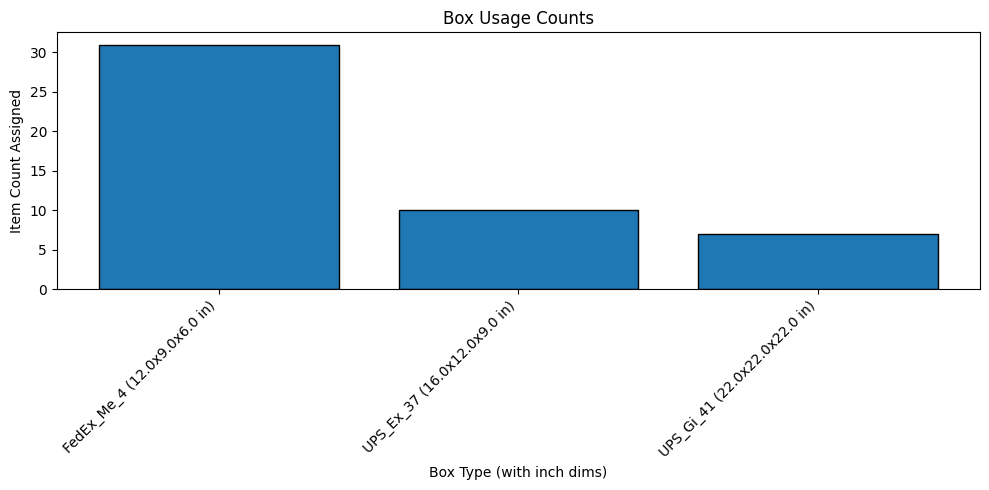

,Box Type,Count,Assigned Bags
0,FedEx_Me_4 (12.0x9.0x6.0 in),31,"Chanel Mini, Chanel Mini, Chanel Mini, Jacquemus Le Chiquito, Jacquemus Le Chiquito, Jacquemus Le Chiquito, Chanel Small Flap, Chanel Small Flap, Chanel Small Flap, LV Alma BB, LV Alma BB, LV Alma BB, Gucci Mini Dionysus, Gucci Mini Dionysus, Gucci Mini Dionysus, Chanel Medium to Maxi Flap, Chanel Medium to Maxi Flap, Chanel Medium to Maxi Flap, LV Speedy 25-35, LV Speedy 25-35, LV Speedy 25-35, Bottega Jodie, Bottega Jodie, Bottega Jodie, Dolce & Gabbana - Devotion Top-handle bag, LV Safran Leather Milla PM, Saint Laurent - CASSANDRE ENVELOPE CHAIN WALLE..., LV mini cone decorated with the CASSANDRE, LV The Speedy Bandoulière 20, Mini Devotion Leather Top Handle Bag, Burberry - Lambskin Quilted Card Case With Det..."
1,UPS_Ex_37 (16.0x12.0x9.0 in),10,"Dior Book Tote, Dior Book Tote, Dior Book Tote, LV OnTheGo GM, LV OnTheGo GM, LV OnTheGo GM, Goyard Artois, Goyard Artois, Goyard Artois, Louis Vuitton - Speedy Bandoulière 30 Damier A..."
2,UPS_Gi_41 (22.0x22.0x22.0 in),7,"Horizon 55, Horizon 55, Horizon 55, Rimowa Cabin, Rimowa Cabin, Rimowa Cabin, LV Pegase 55 leather travel bag"


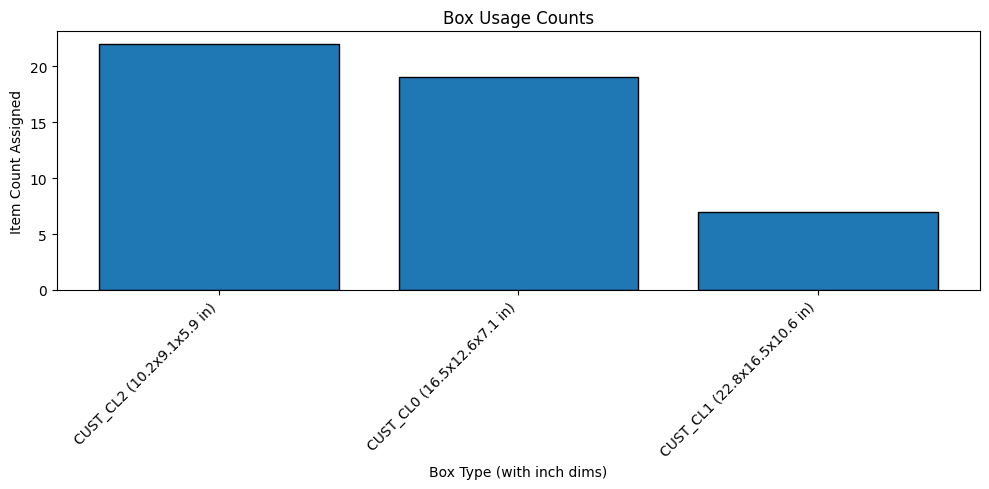

,Box Type,Count,Assigned Bags
0,CUST_CL2 (10.2x9.1x5.9 in),22,"Chanel Mini, Chanel Mini, Chanel Mini, Jacquemus Le Chiquito, Jacquemus Le Chiquito, Jacquemus Le Chiquito, Chanel Small Flap, Chanel Small Flap, Chanel Small Flap, LV Alma BB, LV Alma BB, LV Alma BB, Gucci Mini Dionysus, Gucci Mini Dionysus, Gucci Mini Dionysus, Dolce & Gabbana - Devotion Top-handle bag, LV Safran Leather Milla PM, Saint Laurent - CASSANDRE ENVELOPE CHAIN WALLE..., LV mini cone decorated with the CASSANDRE, LV The Speedy Bandoulière 20, Mini Devotion Leather Top Handle Bag, Burberry - Lambskin Quilted Card Case With Det..."
1,CUST_CL0 (16.5x12.6x7.1 in),19,"Chanel Medium to Maxi Flap, Chanel Medium to Maxi Flap, Chanel Medium to Maxi Flap, LV Speedy 25-35, LV Speedy 25-35, LV Speedy 25-35, Bottega Jodie, Bottega Jodie, Bottega Jodie, Dior Book Tote, Dior Book Tote, Dior Book Tote, LV OnTheGo GM, LV OnTheGo GM, LV OnTheGo GM, Goyard Artois, Goyard Artois, Goyard Artois, Louis Vuitton - Speedy Bandoulière 30 Damier A..."
2,CUST_CL1 (22.8x16.5x10.6 in),7,"Horizon 55, Horizon 55, Horizon 55, Rimowa Cabin, Rimowa Cabin, Rimowa Cabin, LV Pegase 55 leather travel bag"


,Box Type,Count,Assigned Bags
0,CUST_CL2 (10.2x9.1x5.9 in),22,"Chanel Mini, Chanel Mini, Chanel Mini, Jacquem..."
1,CUST_CL0 (16.5x12.6x7.1 in),19,"Chanel Medium to Maxi Flap, Chanel Medium to M..."
2,CUST_CL1 (22.8x16.5x10.6 in),7,"Horizon 55, Horizon 55, Horizon 55, Rimowa Cab..."


In [ ]:
bags_df = pd.read_csv('bags.csv')  # needs columns: bag_name, length_cm, width_cm, height_cm
box_df  = pd.read_csv('box.csv')   # needs columns: box_type, length_cm, width_cm, height_cm, volume_cm3, carrier

assigner = BoxAssigner(box_df, num_of_box=3)

# A) Use mixed catalog (existing boxes)
best_assignment, results = assigner.assigner(bags_df, selected_carrier='mixed')
assigner.plot_assignment(results)
assigner.table_assignments(best_assignment)

# B) Use customized mode (synthesize new boxes)
assigner.set_custom_config({
    "pad_pct": 0.05,        # 5% padding
    "round_to_mm": None,    # or 5 to snap up to nearest 5 mm
    "n_clusters": None,     # default to num_of_box
    "base_name": "CUST"
})
best_assignment_c, results_c = assigner.assigner(bags_df, selected_carrier='customized')
assigner.plot_assignment(results_c)
assigner.table_assignments(best_assignment_c)


In [194]:
import math
import re
import pandas as pd

# -----------------------------
# Distance-based USPS zone
# -----------------------------
class USPSZoneFinder:
    def __init__(self, zip_data_path="uszips.csv"):
        df = pd.read_csv(zip_data_path, dtype={"zip": str})
        self.zip_lookup = {row["zip"]: (row["lat"], row["lng"]) for _, row in df.iterrows()}

    def haversine_miles(self, zip1, zip2):
        if zip1 not in self.zip_lookup or zip2 not in self.zip_lookup:
            raise ValueError(f"ZIP not found in database: {zip1 if zip1 not in self.zip_lookup else zip2}")
        lat1, lon1 = self.zip_lookup[zip1]
        lat2, lon2 = self.zip_lookup[zip2]
        lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = math.sin(dlat/2)**2 + math.cos(lat1)*math.cos(lat2)*math.sin(dlon/2)**2
        c = 2 * math.asin(math.sqrt(a))
        return 3956 * c

    def get_zone(self, zip_origin, zip_dest):
        miles = self.haversine_miles(zip_origin, zip_dest)
        if miles <= 50:   return 1
        if miles <= 150:  return 2
        if miles <= 300:  return 3
        if miles <= 600:  return 4
        if miles <= 1000: return 5
        if miles <= 1400: return 6
        if miles <= 1800: return 7
        return 8  # (use 9 separately if you later include territories)


# ---------------------------------------------
# Loader + pricer for USPS Cubic rates (XLSX)
# ---------------------------------------------
class USPSCubicRateBook:
    """
    Reads the USPS Ground Advantage Cubic table from an Excel sheet laid out like your image:
      - A header row containing "Cubic Ft. Range Up to:"
      - 10 tiers; each tier has two rows: retail (first) then commercial (second)
      - Zone columns named 'Zone 1'...'Zone 8' (Zone 9 optional)
    Provides: get_rate_cm(L_cm, W_cm, H_cm, zone, kind)
    """
    def __init__(self, xlsx_path: str, sheet_name: str = "Ground Advantage"):
        self.path = xlsx_path
        self.sheet_name = sheet_name
        self._tidy = self._load_tidy_table()

    @staticmethod
    def _to_tier(label: str) -> int | None:
        m = re.search(r"Cubic\s*Tier\s*(\d+)", str(label), flags=re.I)
        return int(m.group(1)) if m else None

    def _load_tidy_table(self) -> pd.DataFrame:
        sh = pd.read_excel(self.path, sheet_name=self.sheet_name, header=None)

        # find the header row
        hdr_idx_list = sh.index[sh.iloc[:,0].astype(str).str.contains("Cubic Ft. Range Up to:", na=False, case=False)].tolist()
        if not hdr_idx_list:
            raise ValueError(f"Header 'Cubic Ft. Range Up to:' not found in sheet '{self.sheet_name}'")
        hdr = hdr_idx_list[0]

        # build zone column names
        header_row = sh.iloc[hdr].fillna("").astype(str).tolist()
        zone_names = [c for c in header_row if c.strip().lower().startswith("zone")]
        zones = [f"Zone {i+1}" for i in range(len(zone_names))]  # keep order as in sheet

        # the following rows (retail+commercial per tier)
        # we take a generous slice (next ~30 rows) and trim empties later
        block = sh.iloc[hdr+1: hdr+1+30, :len(zones)+1].copy()
        block.columns = ["label"] + zones

        # parse into tidy rows
        rows = []
        current_tier = None
        expect_kind = "retail"  # first of the pair is retail, second is commercial
        for _, r in block.iterrows():
            label = r["label"]
            if pd.notna(label) and str(label).strip():
                # first row of a tier pair (retail)
                current_tier = self._to_tier(label)
                expect_kind = "retail"
            else:
                # second row (commercial)
                expect_kind = "commercial"

            if current_tier is None:
                continue

            for zname in zones:
                val = r.get(zname)
                if pd.isna(val): 
                    continue
                # zones are 1-based in text
                znum = int(zname.split()[-1])
                rows.append({"tier": current_tier, "zone": znum, "kind": expect_kind, "rate": float(val)})

        tidy = pd.DataFrame(rows)
        if tidy.empty:
            raise ValueError("USPS cubic parsing produced no rows—check the sheet layout/name.")
        return tidy

    # ---- helpers for cubic feet & tier ----
    @staticmethod
    def _cuft_from_cm(L_cm, W_cm, H_cm) -> float:
        L_in, W_in, H_in = float(L_cm)/2.54, float(W_cm)/2.54, float(H_cm)/2.54
        return (L_in * W_in * H_in) / 1728.0

    @staticmethod
    def _tier_from_cuft(cuft: float) -> int | None:
        for t in range(1, 11):
            if cuft <= t * 0.10 + 1e-9:
                return t
        return None  # > 1.00 ft³

    # ---- public API ----
    def get_rate_cm(self, L_cm, W_cm, H_cm, zone: int, kind: str = "commercial") -> dict:
        """
        Returns: {'tier', 'cubic_ft', 'zone', 'kind', 'rate'}
        kind: 'retail' or 'commercial'
        """
        cuft = self._cuft_from_cm(L_cm, W_cm, H_cm)
        tier = self._tier_from_cuft(cuft)
        if tier is None:
            return {"tier": None, "cubic_ft": cuft, "zone": zone, "kind": kind, "rate": None}

        k = "commercial" if str(kind).lower().startswith("com") else "retail"
        df = self._tidy
        hit = df[(df["tier"] == tier) & (df["zone"] == int(zone)) & (df["kind"] == k)]
        rate = None if hit.empty else float(hit["rate"].iloc[0])
        return {f"tier: {tier}, cubic_ft: {round(cuft,2)}, zone: {int(zone)}, kind: {k}, rate: ${rate}"}


In [195]:
# 1) get USPS zone from ZIPs (your finder)
origin_zip = "23220"
dest_zip = "90001"
zone = zone_finder.get_zone(origin_zip, dest_zip)   # Richmond → Los Angeles
distance = zone_finder.haversine_miles(origin_zip, dest_zip)   

print(f"Distance: {distance:.1f} miles → Zone {zone}")

# 2) load the USPS Ground Advantage Cubic sheet from your Excel
usps_rb = USPSCubicRateBook("usps.xlsx", sheet_name="Ground")

# 3) quote a box (dimensions in cm)
L_cm, W_cm, H_cm = 35.0, 25.0, 12.0
quote_com = usps_rb.get_rate_cm(L_cm, W_cm, H_cm, zone=zone, kind="commercial")
quote_ret = usps_rb.get_rate_cm(L_cm, W_cm, H_cm, zone=zone, kind="retail")

print(quote_com)  # {'tier': 3, 'cubic_ft': 0.xxx, 'zone': 8, 'kind': 'commercial', 'rate': 17.76}
print(quote_ret)  # same, with retail price


Distance: 2280.7 miles → Zone 8
{'tier: 4, cubic_ft: 0.37, zone: 8, kind: commercial, rate: $13.31'}
{'tier: 4, cubic_ft: 0.37, zone: 8, kind: retail, rate: $12.78'}


In [238]:
import re
import pandas as pd

import re
import pandas as pd

# -----------------------------
# Return ZIP3 only (no zone math)
# -----------------------------
class UPSZoneFinder:
    def __init__(self, path: str = "ups_zone.xlsx"):
        try:
            self.df = pd.read_excel(path, dtype=str)
        except Exception:
            self.df = None  # not required for ZIP3

    def get_zone(self, three_digit_zip_dest: str, delivary_type: str = 'Ground') -> str:
        """Return the first 3 digits of the destination ZIP (zero-padded)."""
        row_number = three_digit_zip_dest[:3]
        return self.df.loc[self.df['Dest. ZIP'] == row_number, delivary_type].iloc[0]


# ------------------------------------
# Use ZIP3 *columns* to find the rate
# ------------------------------------
class UPSRateCalculator:
    """
    Read a UPS service sheet (e.g., 'Ground') and return rate by ZIP3 column + weight row.
    Handles:
      • header on row 1 OR below a title block
      • ZIP3 columns as pure numbers (102) or labels containing 3-digit tokens ('ZIP 102', '102-104')
      • value cleanup ($, commas, spaces, 'nan' as text)
      • expanding ZIP3 ranges to all ZIP3s in the range
    """
    def __init__(self, path: str = 'ups.xlsx', name: str = 'Ground', header_row: int | None = None):
        self.path = path
        self.name = name
        self.header_row = header_row
        self.df, self._zip3_to_col = self._load_and_normalize()

    # ---------- internals ----------
    @staticmethod
    def _expand_zip3_range_token(token: str) -> list[str]:
        """
        Given a header token like '124-126' or '124 – 126', return ['124','125','126'].
        If it's just '124' return ['124'].
        """
        s = str(token)
        m = re.match(r'\s*(\d{3})\s*[-–—]\s*(\d{3})\s*$', s)
        if m:
            a, b = int(m.group(1)), int(m.group(2))
            if a > b: a, b = b, a
            return [f"{x:03d}" for x in range(a, b+1)]
        m2 = re.search(r'(\d{3})', s)
        return [m2.group(1)] if m2 else []

    def _try_build(self, df: pd.DataFrame):
        # Normalize headers
        df.columns = [str(c).strip() for c in df.columns]

        # Detect/rename weight column
        if 'weight' not in df.columns:
            wcol = None
            for c in df.columns:
                if 'weight' in c.lower() or 'lb' in c.lower():
                    wcol = c
                    break
            if wcol is None:
                wcol = df.columns[0]
            df = df.rename(columns={wcol: 'weight'})
        df['weight'] = df['weight'].astype(str).str.strip()

        # Build ZIP3 -> column map (expands ranges)
        zip3_to_col: dict[str, str] = {}
        for c in df.columns:
            if c == 'weight':
                continue
            # get all zip3s that this column represents
            zlist = self._expand_zip3_range_token(c)
            for z in zlist:
                if z and z not in zip3_to_col:
                    zip3_to_col[z] = c

        # Clean currency/formatting in value cells (and textual 'nan')
        for c in df.columns:
            if c == 'weight':
                continue
            s = (
                df[c].astype(str)
                     .str.replace(r'[^0-9.\-]', '', regex=True)  # strip $, commas, spaces
                     .str.replace(r'^(nan|NaN|None)$', '', regex=True)
            )
            s = s.replace({'': None})
            df[c] = s

        return df, zip3_to_col

    def _load_and_normalize(self):
        # If user gave header_row, use it
        if self.header_row is not None:
            raw = pd.read_excel(self.path, sheet_name=self.name, header=None, dtype=str)
            header = [str(x).strip() for x in raw.iloc[self.header_row].tolist()]
            data = raw.iloc[self.header_row + 1:].copy()
            data.columns = header
            return self._try_build(data)

        # First: simple header
        df0 = pd.read_excel(self.path, sheet_name=self.name, dtype=str)
        df1, m1 = self._try_build(df0)
        if m1:
            return df1, m1

        # Fallback: header below a title block → scan for best header row (max 3-digit tokens)
        raw = pd.read_excel(self.path, sheet_name=self.name, header=None, dtype=str)
        best_idx, best_hits = None, -1
        scan_rows = min(20, len(raw))
        for i in range(scan_rows):
            row_vals = [str(x) for x in raw.iloc[i].tolist()]
            hits = sum(bool(re.search(r'\b\d{3}\b', v)) for v in row_vals)
            # also prefer rows whose first cell equals 'weight'
            weight_bonus = 5 if str(raw.iloc[i, 0]).strip().lower() == 'weight' else 0
            score = hits + weight_bonus
            if score > best_hits:
                best_hits, best_idx = score, i

        if best_idx is None:
            raise ValueError("Could not locate a header row with ZIP3 columns.")

        header = [str(x).strip() for x in raw.iloc[best_idx].tolist()]
        data = raw.iloc[best_idx + 1:].copy()
        data.columns = header
        df2, m2 = self._try_build(data)
        if m2:
            return df2, m2

        # If still nothing, show what we saw
        raise ValueError(
            "No ZIP3 destination columns found in the UPS rate sheet.\n"
            f"Detected columns: {list(df1.columns)}\n"
            "Tip: pass header_row=ROW_INDEX if your header is not on the first row."
        )

    # ---------- public API ----------
    def get_rate(self, zip3: str, weight: str = '1') -> float:
        """
        Look up the rate using the ZIP3 destination column and exact weight row.
        zip3: '124', '102', … (normalized to 3 digits)
        weight: must match a value in the 'weight' column (e.g., '1','2','3',…)
        """
        key = str(zip3)[:3].zfill(3)
        if key not in self._zip3_to_col:
            sample_keys = list(self._zip3_to_col)[:10]
            raise ValueError(f"ZIP3 '{key}' not present. Example ZIP3 columns: {sample_keys}")
        col = self._zip3_to_col[key]

        w = str(weight).strip()
        row = self.df.loc[self.df['weight'] == w]
        if row.empty:
            examples = self.df['weight'].head(5).tolist()
            raise ValueError(f"Weight '{w}' not found. Examples: {examples}")

        val = row[col].iloc[0]
        if val is None or (isinstance(val, float) and pd.isna(val)):
            raise ValueError(f"No rate for weight='{w}', ZIP3='{key}' (column '{col}').")
        try:
            return float(val)
        except Exception as e:
            raise ValueError(f"Rate not numeric for weight='{w}', ZIP3='{key}': {val!r}") from e

    def debug(self, n_keys: int = 12):
        """Quick peek: first few mapped ZIP3→column and weights."""
        print("Mapped ZIP3 columns:", list(self._zip3_to_col)[:n_keys])
        print("First weights:", self.df['weight'].head(10).tolist())


In [239]:
# Load UPS Zone Finder
path = "ups_zone.xlsx"
zone_finder = UPSZoneFinder(path)
dest_zip = "90001"
delivary_type = '3 Day Select'
zone = zone_finder.get_zone(dest_zip, delivary_type)
zone

# Load UPS Rate
path='ups.xlsx'
name='3 Day Select'
rate_finder = UPSRateCalculator(path, name)
rate = rate_finder.get_rate(zone)
rate



38.73

In [6]:
print("UPS Zone:", 2)

UPS Zone: 2


In [3]:
from scipy.stats import randint

a = 80
b = 100
x = 90

print('pmf', randint.pmf(x, a, b+1))
print('cdf', randint.cdf(x, a, b+1))
print('ppf', randint.ppf(x, a, b+1))
mean, var, skew, kurt = randint.stats(a, b+1, moments='mvsk')
print(mean, var, skew, kurt)

pmf 0.047619047619047616
cdf 0.5238095238095238
ppf nan
90.0 36.666666666666664 0.0 -1.2054545454545453
